# Clasificación de vocalizaciones de aves

In [20]:
#Imports Globales

import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# Funciones Globales.
def count_files_in_subfolders(main_folder):
    sfcounts = {}
    # root is the current directory path
    # dirs is a list of subdirectories in the current directory
    # files is a list of files in the current directory
    for root, dirs, files in os.walk(main_folder):
        # Count only in subfolders, not in the main folder itself
        if root != main_folder:
            h5_files = [file for file in files if file.endswith(".h5")]
            subfolder_name = os.path.basename(root)
            sfcounts[subfolder_name] = len(h5_files)
    return sfcounts

def plot_histogram(sub_folder_counts):
    # Extract counts and subfolder names
    sorted_subfolders = sorted(sub_folder_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract counts and subfolder names after sorting
    counts = [count for subfolder, count in sorted_subfolders]
    subfolders = [subfolder for subfolder, count in sorted_subfolders]

    # Plot histogram
    plt.figure(figsize=(8, 6))
    bars = plt.bar(subfolders, counts, color='mediumturquoise', edgecolor='lightseagreen')
    plt.xlabel('Bird Names')
    plt.ylabel('Number of Spectograms')
    plt.title('Number of Spectograms of Birds', weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Add counts above each bar
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

## Conteo de espectrogramas por ave

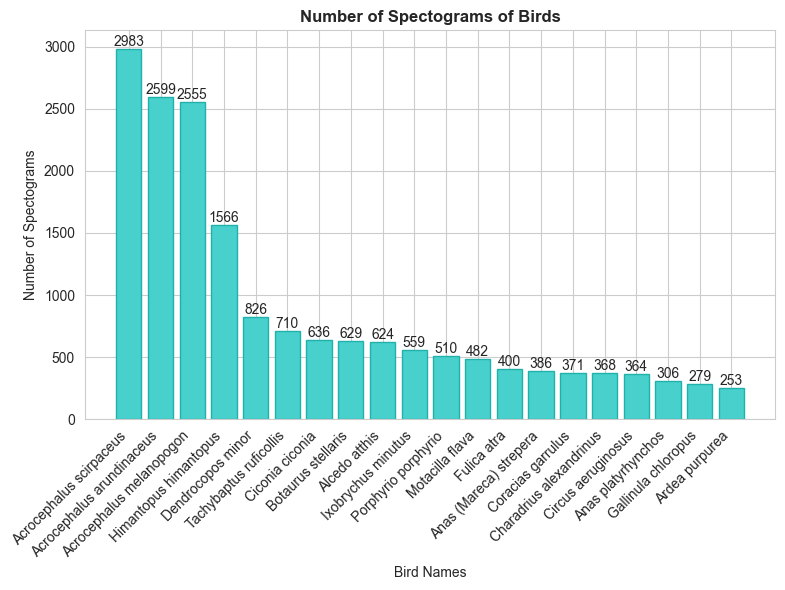

In [21]:
# Ruta a los espectrogramas convertidos a hdf5
main_folder_path = os.path.abspath("./data/spects_h5")

# Conteo de archivos por tipo de pájaro
subfolder_counts = count_files_in_subfolders(main_folder_path)

# Histograma de distribución de muestras
plot_histogram(subfolder_counts)

In [22]:
# Cargar los espectrogramas & labels
spectrograms_folder = os.path.abspath("./data/spectrograms")
bird_folders = [folder for folder in os.listdir(spectrograms_folder) if not os.path.isfile(folder)]
print(bird_folders)

# Crear un archivo h5 para agrupar los espectrogramas por nombre de audio
with h5py.File(os.path.abspath("./data/spectrograms.h5"), "w") as hf:
    for bird_folder in bird_folders:
        bird_name = bird_folder.split("_")[0]  # Obtener el nombre del pájaro
        spectogram_files = os.listdir(os.path.join(spectrograms_folder, bird_folder))
        for spectogram_file in spectogram_files:
            if spectogram_file.endswith(".npy"):
                audio_name = spectogram_file.split("_")[0]
                if audio_name not in hf:
                    audio_group = hf.create_group(audio_name)
                    # Agregar el nombre del pájaro al grupo del audio
                    audio_group.attrs["bird"] = bird_name
                spectogram_path = os.path.join(spectrograms_folder, bird_folder, spectogram_file)
                spectogram = np.load(spectogram_path)
                hf[audio_name].create_dataset(spectogram_file, data=spectogram)
                
# Open the h5 file
audio_names = []
with h5py.File(os.path.abspath("./data/spectrograms.h5")) as hf:
    # Get the keys of the groups (audio names)
    audio_names = list(hf.keys())

print(audio_names)

['Acrocephalus scirpaceus', 'Anas (Mareca) strepera', 'Porphyrio porphyrio', 'Circus aeruginosus', 'Motacilla flava', 'Acrocephalus arundinaceus', 'Fulica atra', 'Botaurus stellaris', 'Himantopus himantopus', 'Acrocephalus melanopogon', 'Tachybaptus ruficollis', 'Ardea purpurea', 'Charadrius alexandrinus', 'Ixobrychus minutus', 'Anas platyrhynchos', 'Coracias garrulus', 'Dendrocopos minor', 'Alcedo atthis', 'Ciconia ciconia', 'Gallinula chloropus']
['XC100296', 'XC100619', 'XC100621', 'XC100622', 'XC102793', 'XC102794', 'XC103243', 'XC103696', 'XC106948', 'XC106971', 'XC109629', 'XC112488', 'XC113587', 'XC113968', 'XC118195', 'XC120332', 'XC120378', 'XC120411', 'XC120730', 'XC121174', 'XC127375', 'XC129156', 'XC129188', 'XC129193', 'XC129377', 'XC131532', 'XC132077', 'XC132435', 'XC133548', 'XC134051', 'XC134073', 'XC134081', 'XC134219', 'XC134221', 'XC134240', 'XC134257', 'XC134457', 'XC134761', 'XC134762', 'XC134843', 'XC135278', 'XC135429', 'XC135579', 'XC135658', 'XC141019', 'XC141

In [23]:
# Empty list to store the name of each group and bird name
bird_info = []
# Leer el archivo H5 existente
with h5py.File(os.path.abspath("./data/spectrograms.h5")) as hf:
    for audio_name in hf.keys():
        bird_name = hf[audio_name].attrs["bird"]
        bird_info.append([audio_name, bird_name])

print(bird_info)

[['XC100296', 'Botaurus stellaris'], ['XC100619', 'Circus aeruginosus'], ['XC100621', 'Circus aeruginosus'], ['XC100622', 'Circus aeruginosus'], ['XC102793', 'Motacilla flava'], ['XC102794', 'Motacilla flava'], ['XC103243', 'Ixobrychus minutus'], ['XC103696', 'Motacilla flava'], ['XC106948', 'Acrocephalus melanopogon'], ['XC106971', 'Ixobrychus minutus'], ['XC109629', 'Anas (Mareca) strepera'], ['XC112488', 'Circus aeruginosus'], ['XC113587', 'Anas platyrhynchos'], ['XC113968', 'Anas platyrhynchos'], ['XC118195', 'Himantopus himantopus'], ['XC120332', 'Charadrius alexandrinus'], ['XC120378', 'Botaurus stellaris'], ['XC120411', 'Dendrocopos minor'], ['XC120730', 'Coracias garrulus'], ['XC121174', 'Coracias garrulus'], ['XC127375', 'Anas platyrhynchos'], ['XC129156', 'Dendrocopos minor'], ['XC129188', 'Ciconia ciconia'], ['XC129193', 'Dendrocopos minor'], ['XC129377', 'Dendrocopos minor'], ['XC131532', 'Circus aeruginosus'], ['XC132077', 'Himantopus himantopus'], ['XC132435', 'Himantopus

In [24]:
from collections import defaultdict

audios_per_bird = defaultdict(list)
for audio in bird_info:
    bird_name = audio[1]
    audios_per_bird[bird_name].append(audio[0])

train_audio_names = []
test_audio_names = []

for bird, audios in audios_per_bird.items():
    num_audios = len(audios)
    num_train = int(0.7 * num_audios)

    train_audio_names.extend([audio for audio in audios[:num_train]])
    test_audio_names.extend([audio for audio in audios[num_train:]])

print("Training list:")
print(train_audio_names)

print("Testing list:")
print(test_audio_names)

Training list:
['XC100296', 'XC120378', 'XC171445', 'XC172692', 'XC180756', 'XC184313', 'XC184314', 'XC184429', 'XC214099', 'XC215785', 'XC216709', 'XC216710', 'XC234105', 'XC237486', 'XC25558', 'XC280964', 'XC280965', 'XC280966', 'XC293293', 'XC299191', 'XC309607', 'XC310507', 'XC314697', 'XC315733', 'XC317323', 'XC317421', 'XC326162', 'XC340916', 'XC354109', 'XC354111', 'XC361803', 'XC361804', 'XC361806', 'XC362697', 'XC363294', 'XC367219', 'XC372105', 'XC37543', 'XC396412', 'XC100619', 'XC100621', 'XC100622', 'XC112488', 'XC131532', 'XC134843', 'XC143954', 'XC145121', 'XC161966', 'XC164817', 'XC189879', 'XC189882', 'XC189883', 'XC196976', 'XC205076', 'XC235176', 'XC262846', 'XC269744', 'XC269745', 'XC280997', 'XC280998', 'XC296061', 'XC341264', 'XC357371', 'XC365601', 'XC102793', 'XC102794', 'XC103696', 'XC134257', 'XC154563', 'XC154909', 'XC155710', 'XC164172', 'XC184433', 'XC184434', 'XC208705', 'XC223168', 'XC252756', 'XC252757', 'XC270056', 'XC281357', 'XC281358', 'XC281359', 'X

In [25]:
# Create a new file h5 to store the data for training the model
with (  h5py.File(os.path.abspath("./data/data_train.h5"), "w") as hf_train,
        h5py.File(os.path.abspath("./data/spectrograms.h5")) as hf ):
    # Create group "X" to store the spectograms
    X_group = hf_train.create_group("X")

    # Create group "y" to store the names of the birds (labels)
    y_group = hf_train.create_group("y")

    for audio_name in train_audio_names:
        # get the name of the corresponding bird
        bird_name = hf[audio_name].attrs["bird"]

        # read the spectograms of the audio
        spectrogram_names = list(hf[audio_name].keys())

        for spectrogram_name in spectrogram_names:
            # Read the espectogram
            spectrogram_data = hf[audio_name][spectrogram_name][...]
            # Save the espectogram in group X
            X_group.create_dataset(spectrogram_name, data=spectrogram_data)
            # Save the name of the corresponding bird in th group Y
            y_group.create_dataset(spectrogram_name, data=bird_name)
            
# create the LabelEncoder
le = LabelEncoder()
X_train = []
y_train = []

# Agrupamos espectrogramas
with h5py.File(os.path.abspath("./data/data_train.h5")) as hf_train:
    # Access to a specific group
    group_Xtrain = 'X'
    group_ytrain = 'y'
    groupXtrain = hf_train[group_Xtrain]
    groupytrain = hf_train[group_ytrain]

    # Apilamos espectrogramas y labels
    for key in groupXtrain.keys():
        spectogram = groupXtrain[key]
        X_train.append(spectogram[()])

    for key in groupytrain.keys():
        bird = groupytrain[key]
        y_train.append(bird[()])


In [26]:
y_train = [data.decode('utf-8') for data in y_train]
y_train

['Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Botaurus stellaris',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus aeruginosus',
 'Circus ae

In [27]:
print(len(X_train))
print(X_train[0])
print(len(y_train))
print(y_train[0])

# Encode the labels
y_train = le.fit_transform(y_train)
print(y_train)
# Print the labels of the numeric values
print(le.classes_)

12401
[[-21.927137  -15.885366  -19.596134  ... -18.738977  -23.22766
  -17.782948 ]
 [-12.636152  -11.506808  -11.128322  ... -10.50968   -10.998185
  -10.78977  ]
 [-12.187175  -11.1988535  -9.465328  ... -12.4952135  -8.489763
   -6.875704 ]
 ...
 [-30.68443   -33.02369   -44.774403  ... -43.156998  -44.312088
  -45.63829  ]
 [-31.113174  -33.508293  -51.244854  ... -46.52222   -44.80766
  -45.12627  ]
 [-31.21983   -33.517517  -46.67358   ... -47.840645  -51.671494
  -52.546104 ]]
12401
Botaurus stellaris
[ 7  7  7 ... 14 14 14]
['Acrocephalus arundinaceus' 'Acrocephalus melanopogon'
 'Acrocephalus scirpaceus' 'Alcedo atthis' 'Anas (Mareca) strepera'
 'Anas platyrhynchos' 'Ardea purpurea' 'Botaurus stellaris'
 'Charadrius alexandrinus' 'Ciconia ciconia' 'Circus aeruginosus'
 'Coracias garrulus' 'Dendrocopos minor' 'Fulica atra'
 'Gallinula chloropus' 'Himantopus himantopus' 'Ixobrychus minutus'
 'Motacilla flava' 'Porphyrio porphyrio' 'Tachybaptus ruficollis']


In [28]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = X_train / 255.0

X_train = X_train.reshape((-1, 224, 224, 1))
print(X_train.shape)

(12401, 224, 224, 1)


In [29]:
print(y_train.shape)
print(len(y_train))

(12401,)
12401


In [30]:
from keras.src.losses import SparseCategoricalCrossentropy

# Si el modelo no existe, entrenarlo y guardarlo,
if not os.path.exists(os.path.abspath("./data/DL_model_birds.h5")):
    # CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(20)    
    ])
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=35)
    
    # Guardar el modelo
    model.save(os.path.abspath("./data/DL_model_birds.h5"))
    print(f"Modelo guardado exitosamente en {os.path.abspath('./data/DL_model_birds.h5')}")
else:
    from tensorflow.keras.models import load_model
    # cargar el modelo
    model = load_model(os.path.abspath("./data/DL_model_birds.h5"))
    print(f"Cargamos el modelo desde el archivo {os.path.abspath('./data/DL_model_birds.h5')}")

/Users/edwinlopezariaz/UNI/MINERIA-DATOS/PRACTICA/mbd-datamining-p01/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 163s 417ms/step - accuracy: 0.2622 - loss: 2.3925
Epoch 2/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 164s 422ms/step - accuracy: 0.5450 - loss: 1.4102
Epoch 3/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 171s 442ms/step - accuracy: 0.6518 - loss: 1.0621
Epoch 4/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 164s 422ms/step - accuracy: 0.7017 - loss: 0.8910
Epoch 5/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 160s 412ms/step - accuracy: 0.7339 - loss: 0.7690
Epoch 6/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 164s 422ms/step - accuracy: 0.7680 - loss: 0.6717
Epoch 7/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 164s 423ms/step - accuracy: 0.7908 - loss: 0.6088
Epoch 8/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 163s 419ms/step - accuracy: 0.8104 - loss: 0.5489
Epoch 9/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 163s 419ms/step - accuracy: 0.8315 - loss: 0.4898
Epoch 10/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 163s 420ms/step - accuracy: 0.8389 - loss: 0.4692
Epoch 11/35
388/388 ━━━━━━━━━━━━━━━━━━━━ 164s 424ms/step - accuracy: 0.8497 - loss: 0.4251
Epoch 12

Modelo guardado exitosamente en /Users/edwinlopezariaz/UNI/MINERIA-DATOS/PRACTICA/mbd-datamining-p01/data/DL_model_birds.h5


  ## Testing part: X_test, y_test

In [31]:
# H5 file to store the testing data
with (  h5py.File(os.path.abspath("./data/data_test.h5"), "w") as hf_test, 
        h5py.File(os.path.abspath("./data/spectrograms.h5")) as hf ):
    # Group "X" to store the spectograms for testing
    X_group = hf_test.create_group("X")

    #  Group "X" to store the labels for testing
    y_group = hf_test.create_group("y")

    for audio_name in test_audio_names:
        # Get the name of the corresponding bird of the audio
        bird_name = hf[audio_name].attrs["bird"]

        # read the spectograms
        spectrogram_names = list(hf[audio_name].keys())

        for spectrogram_name in spectrogram_names:
            # Read the spectograms
            spectrogram_data = hf[audio_name][spectrogram_name][...]
            # Save the spectogram in group "X"
            X_group.create_dataset(spectrogram_name, data=spectrogram_data)
            # Save the name of the corresponding bird in group "y"
            y_group.create_dataset(spectrogram_name, data=bird_name)

In [32]:
# LabelEncoder
le = LabelEncoder()
X_test = []
y_test = []

In [33]:
with h5py.File(os.path.abspath("./data/data_test.h5")) as hf_test:
    # Access to a specific group
    group_Xtest = 'X'
    group_ytest = 'y'
    groupXtest = hf_test[group_Xtest]
    groupytest = hf_test[group_ytest]

    # Save spectograms and labels
    for key in groupXtest.keys():
        spectogram = groupXtest[key]
        X_test.append(spectogram[()])

    for key in groupytest.keys():
        bird = groupytest[key]
        y_test.append(bird[()])

In [34]:
y_test = le.fit_transform(y_test)
print(y_test)

print(len(X_test))
print(X_test[0])
print(len(y_test))
print(y_test[0])

[11 11 11 ... 19 19 19]
5005
[[-20.10495  -22.45483  -34.465416 ... -31.30346  -23.764065 -20.10495 ]
 [-20.191296 -22.451729 -34.652542 ... -31.30468  -23.671677 -20.191296]
 [-20.099775 -22.468739 -34.67266  ... -31.017902 -23.719769 -20.099775]
 ...
 [-36.612804 -38.671574 -49.253773 ... -39.029205 -36.009964 -36.612804]
 [-36.426376 -38.79451  -50.17266  ... -43.316032 -35.622826 -36.426376]
 [-36.450287 -38.73686  -51.529774 ... -44.752293 -36.199436 -36.450287]]
5005
11


In [35]:
X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = X_test / 255.0
X_test = X_test.reshape((-1, 224, 224, 1))

In [36]:
# Evaluation of the model with the testing data
loss, accuracy = model.evaluate(X_test, y_test)

print("Pérdida:", loss)
print("Precisión:", accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.7417 - loss: 1.8398
Pérdida: 1.3286551237106323
Precisión: 0.7746253609657288


## Predictions of the models and confusion matrix

In [37]:
# Prediction of the model with testing data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step
F1 Score: 0.776846434692808


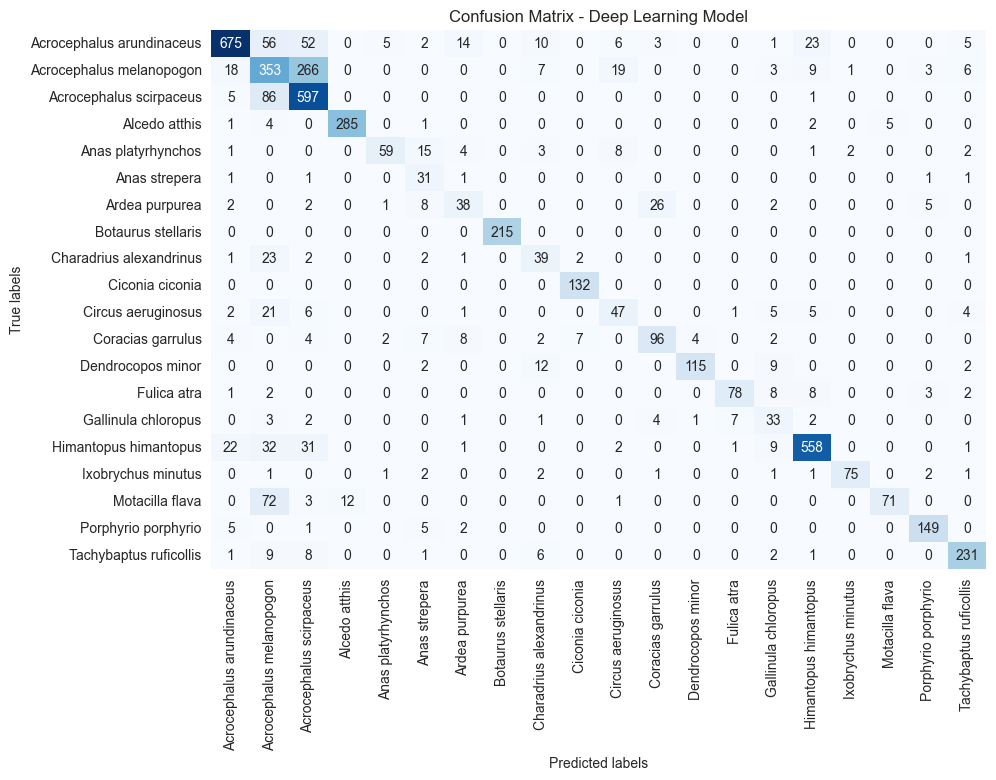

In [38]:
from utils import CLASS_NAMES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(cm, index=CLASS_NAMES, columns=CLASS_NAMES)

# Plot
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()